In [10]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# All methods
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"

In [21]:
df = pd.read_csv('../data/processed/topic_analysis_labeled.csv')
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,cleaned_review,tokens,topic
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… trip verified | flew on turkish airlines i...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,trip flew turkish airlines iadistkhi return kh...,"['trip', 'flew', 'turkish', 'airlines', 'iadis...",3
1,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… trip verified | basel to cape town via ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,trip basel cape town istanbul arrived istanbul...,"['trip', 'basel', 'cape', 'town', 'istanbul', ...",2
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,not verified | abu dhabi to luxembourg via ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,abu dhabi luxembourg istanbul auhist comfortab...,"['abu', 'dhabi', 'luxembourg', 'istanbul', 'au...",3
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… trip verified | the experience with turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,trip experience turkish airlines devastating o...,"['trip', 'experience', 'turkish', 'airlines', ...",2
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… trip verified | houston to kiev via istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,trip houston kiev istanbul fares seem competit...,"['trip', 'houston', 'kiev', 'istanbul', 'fares...",2


<h2>Sentiment analysis</h2>

In [22]:
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)
df[['cleaned_review', 'sentiment']].head()

,cleaned_review,sentiment
0,trip flew turkish airlines iadistkhi return kh...,positive
1,trip basel cape town istanbul arrived istanbul...,neutral
2,abu dhabi luxembourg istanbul auhist comfortab...,positive
3,trip experience turkish airlines devastating o...,negative
4,trip houston kiev istanbul fares seem competit...,positive


/var/folders/69/cxvk42w94ngf56592w6b56fc0000gn/T/ipykernel_4549/1491379991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette=['red', 'gray', 'green'])


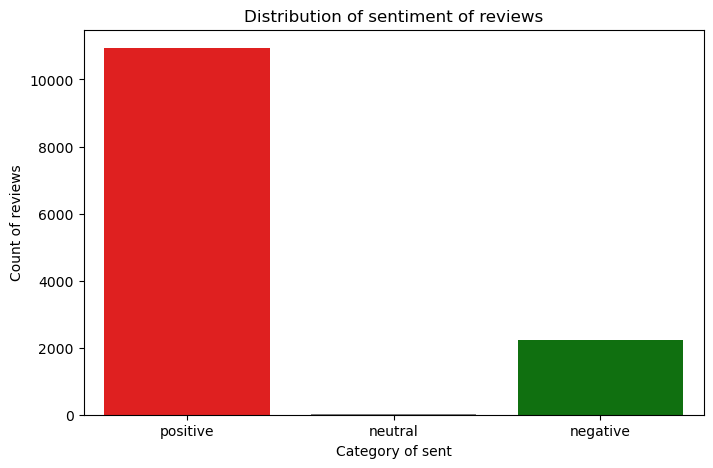

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['sentiment'], palette=['red', 'gray', 'green'])
plt.xlabel("Category of sent")
plt.ylabel("Count of reviews")
plt.title("Distribution of sentiment of reviews")
plt.show()

In [25]:
df.to_csv('../data/processed/topic_analysis_labeled.csv', index=False)